In [65]:
import sklearn.cluster as skc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [66]:
db_prefix = 'zdb_slice_'
db_zeros = '000_'
db_suffix = '999.csv'
NUM_SLICES = 57

In [115]:
data = pd.DataFrame()
for i in range(NUM_SLICES):
    i = str(i)
    with open("zdb/" + db_prefix + i + db_zeros + i + db_suffix) as file:
        data = data.append(pd.read_csv(file))
# playlist_indices = dict(zip(data.columns[1:], data.columns[0]))
# print(playlist_indices)
data = data.drop(data.columns[[0]], 1)


/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1092236050.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(data.columns[[0]], 1)


In [116]:
slice_prefix = 'mpd.slice.'
slice_zeros = '000-'
slice_suffix = '999.json'

playlists = []
for i in range(0,57):#57
    i = str(i)
    with open('spotify_million_playlist_dataset/data/' + slice_prefix + i + slice_zeros + i + slice_suffix) as json_file:
        next_playlist = json.load(json_file)
        # print(np.shape(next_playlist))
    playlists += next_playlist['playlists']
    # print(playlists[0:5])

    

In [117]:
# print playlists at cluster centers


In [118]:
# sort data into list of all data points in a cluster
# NOTE: DATA BY LABELS IS UNSTANDARDIZED
data['label'] = kmeans.labels_
data_by_labels = {}
for i in range(NUM_CLUSTERS):
    data_by_labels[i] = data.loc[data['label'] == i]
    data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[-1]], 1)

# standardize data
# talk about how i standardized means and variances in my paper
# why it works and why i don't have to build the whole dataset again
# find the largest value in a column and divide by it
# 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'date', 'artist_div'

# all the variance values for the [0,1] audio features are super small
# should prob just divide all of them by the largest value
# NON_STANDARTIZED_VALUES = ['loudness', 'loudness_var', 'tempo', 'tempo_var', 'date', 'date_var']

# loudness and date - add smallest value to all values to make them all positive
mins = data.min(axis=0)
# print(mins)
data['loudness'] = data['loudness'].sub(mins['loudness'])
data['date'] = data['date'].sub(mins['date'])

# tempo - subtract minimum value from all values
data['tempo'] = data['tempo'].sub(mins['tempo'])
# mins = data.min(axis=0)
# print(mins)

# divide everything by max value
maxes = data.max()
data = data.divide(maxes)
# print(data.min(axis=0))
# print(data.max(axis=0))


/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/855856422.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[-1]], 1)


In [ ]:
print(data)

In [ ]:
loss = []
for i in range(1,11):
    kmeans = skc.KMeans(n_clusters=i).fit(data)
    loss.append(kmeans.inertia_)
plt.plot(loss)
plt.xticks(range(0,10), range(1,11))

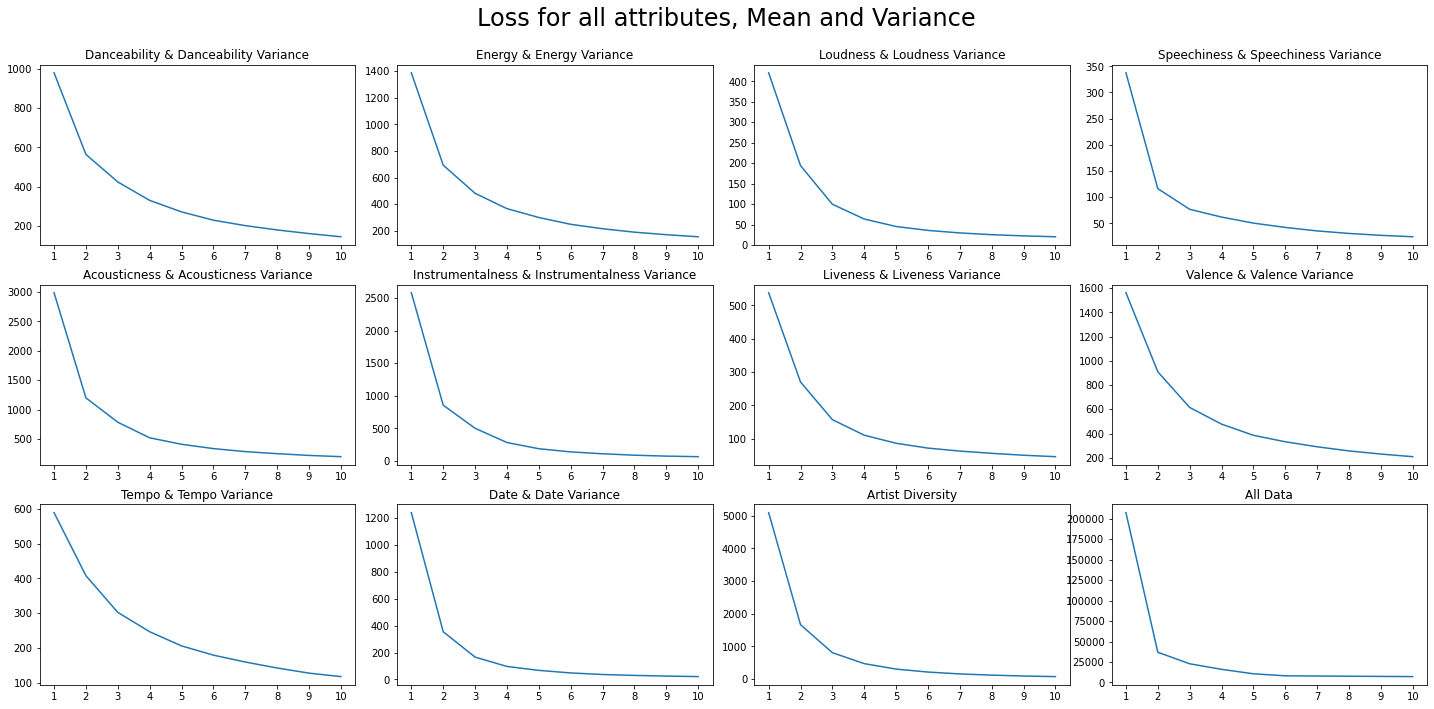

In [128]:
fig, axs = plt.subplots(3,4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle("Loss for all attributes, Mean and Variance", fontsize=24)
fig.tight_layout(h_pad=2)

danceability = np.transpose(np.array([data['danceability'], data['danceability_var']]))
danceability_loss = []
for i in range(1,11):
    danceability_kmeans = skc.KMeans(n_clusters=i).fit(danceability)
    danceability_loss.append(danceability_kmeans.inertia_)
axs[0,0].plot(danceability_loss)
axs[0,0].title.set_text('Danceability & Danceability Variance')
plt.sca(axs[0,0])
plt.xticks(range(0,10), range(1,11))

energy = np.transpose(np.array([data['energy'], data['energy_var']]))
energy_loss = []
for i in range(1,11):
    energy_kmeans = skc.KMeans(n_clusters=i).fit(energy)
    energy_loss.append(energy_kmeans.inertia_)
axs[0,1].plot(energy_loss)
axs[0,1].title.set_text('Energy & Energy Variance')
plt.sca(axs[0,1])
plt.xticks(range(0,10), range(1,11))

loudness = np.transpose(np.array([data['loudness'], data['loudness_var']]))
loudness_loss = []
for i in range(1,11):
    loudness_kmeans = skc.KMeans(n_clusters=i).fit(loudness)
    loudness_loss.append(loudness_kmeans.inertia_)
axs[0,2].plot(loudness_loss)
axs[0,2].title.set_text('Loudness & Loudness Variance')
plt.sca(axs[0,2])
plt.xticks(range(0,10), range(1,11))

speechiness = np.transpose(np.array([data['speechiness'], data['speechiness_var']]))
speechiness_loss = []
for i in range(1,11):
    speechiness_kmeans = skc.KMeans(n_clusters=i).fit(speechiness)
    speechiness_loss.append(speechiness_kmeans.inertia_)
axs[0,3].plot(speechiness_loss)
axs[0,3].title.set_text('Speechiness & Speechiness Variance')
plt.sca(axs[0,3])
plt.xticks(range(0,10), range(1,11))

acousticness = np.transpose(np.array([data['acousticness'], data['acousticness_var']]))
acousticness_loss = []
for i in range(1,11):
    acousticness_kmeans = skc.KMeans(n_clusters=i).fit(acousticness)
    acousticness_loss.append(acousticness_kmeans.inertia_)
axs[1,0].plot(acousticness_loss)
axs[1,0].title.set_text('Acousticness & Acousticness Variance')
plt.sca(axs[1,0])
plt.xticks(range(0,10), range(1,11))

instrumentalness = np.transpose(np.array([data['instrumentalness'], data['instrumentalness_var']]))
instrumentalness_loss = []
for i in range(1,11):
    instrumentalness_kmeans = skc.KMeans(n_clusters=i).fit(instrumentalness)
    instrumentalness_loss.append(instrumentalness_kmeans.inertia_)
axs[1,1].plot(instrumentalness_loss)
axs[1,1].title.set_text('Instrumentalness & Instrumentalness Variance')
plt.sca(axs[1,1])
plt.xticks(range(0,10), range(1,11))

liveness = np.transpose(np.array([data['liveness'], data['liveness_var']]))
liveness_loss = []
for i in range(1,11):
    liveness_kmeans = skc.KMeans(n_clusters=i).fit(liveness)
    liveness_loss.append(liveness_kmeans.inertia_)
axs[1,2].plot(liveness_loss)
axs[1,2].title.set_text('Liveness & Liveness Variance')
plt.sca(axs[1,2])
plt.xticks(range(0,10), range(1,11))

valence = np.transpose(np.array([data['valence'], data['valence_var']]))
valence_loss = []
for i in range(1,11):
    valence_kmeans = skc.KMeans(n_clusters=i).fit(valence)
    valence_loss.append(valence_kmeans.inertia_)
axs[1,3].plot(valence_loss)
axs[1,3].title.set_text('Valence & Valence Variance')
plt.sca(axs[1,3])
plt.xticks(range(0,10), range(1,11))

tempo = np.transpose(np.array([data['tempo'], data['tempo_var']]))
tempo_loss = []
for i in range(1,11):
    tempo_kmeans = skc.KMeans(n_clusters=i).fit(tempo)
    tempo_loss.append(tempo_kmeans.inertia_)
axs[2,0].plot(tempo_loss)
axs[2,0].title.set_text('Tempo & Tempo Variance')
plt.sca(axs[2,0])
plt.xticks(range(0,10), range(1,11))

date = np.transpose(np.array([data['date'], data['date_var']]))
date_loss = []
for i in range(1,11):
    date_kmeans = skc.KMeans(n_clusters=i).fit(date)
    date_loss.append(date_kmeans.inertia_)
axs[2,1].plot(date_loss)
axs[2,1].title.set_text('Date & Date Variance')
plt.sca(axs[2,1])
plt.xticks(range(0,10), range(1,11))

artist_div = np.transpose(np.array([data['artist_div'], data['artist_div']]))
artist_div_loss = []
for i in range(1,11):
    artist_div_kmeans = skc.KMeans(n_clusters=i).fit(artist_div)
    artist_div_loss.append(artist_div_kmeans.inertia_)
axs[2,2].plot(artist_div_loss)
axs[2,2].title.set_text('Artist Diversity')
plt.sca(axs[2,2])
plt.xticks(range(0,10), range(1,11))

loss = []
for i in range(1,11):
    kmeans = skc.KMeans(n_clusters=i).fit(data)
    loss.append(kmeans.inertia_)
axs[2,3].plot(loss)
axs[2,3].title.set_text('All Data')
plt.sca(axs[2,3])
plt.xticks(range(0,10), range(1,11))

plt.subplots_adjust(top=0.9)

plt.show()

In [8]:
# sort all datapoints by their labels
# add column to the dataframe with the labels and then sort by that column
NUM_CLUSTERS = 6
kmeans = skc.KMeans(n_clusters=NUM_CLUSTERS).fit(data)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1793911517.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[-1]], 1)


In [71]:
# sort data into list of all data points in a cluster
data['label'] = kmeans.labels_
data_by_labels = {}
for i in range(NUM_CLUSTERS):
    data_by_labels[i] = data.loc[data['label'] == i]
    data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[-1]], 1)
    # data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[0]], 1)
# print(data_by_labels)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/3359711650.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_by_labels[i] = data_by_labels[i].drop(data_by_labels[i].columns[[-1]], 1)


In [72]:
# find indices of playlists closest to each cluster center
norms = np.array([])
for i, row in data.iterrows():
    # print(row)
    # print(list(row))
    # print(kmeans.cluster_centers_[int(row[-1])])
    # print(np.linalg.norm(list(row)[:-1]-kmeans.cluster_centers_[int(row[-1])]))
    norms = np.append(norms, np.linalg.norm(list(row)[:-1]-kmeans.cluster_centers_[int(row[-1])]))

closest_to_centers_indices = np.argsort(norms)

NUM_CLOSEST_PLAYLISTS = 5
closest_playlists_by_cluster = {}
closest_norms = {}
for i in range(NUM_CLUSTERS):
    closest_playlists_by_cluster[i] = np.array([])
    closest_norms[i] = np.array([])

num_closest_playlist_per_cluster = np.zeros((NUM_CLUSTERS))
data_list = data.values.tolist()
# print(data_list[:3])

for i in closest_to_centers_indices:
    i = int(i)
    # print(i)
    row = data_list[i]
    assigned_cluster = int(row[-1])
    num_closest_playlist_per_cluster[assigned_cluster] += 1
    
    if num_closest_playlist_per_cluster[assigned_cluster] <= NUM_CLOSEST_PLAYLISTS:
        # print(len(playlists))
        # print(playlists[i])
        closest_playlists_by_cluster[assigned_cluster] = np.append(closest_playlists_by_cluster[assigned_cluster], playlists[i])
        closest_norms[assigned_cluster] = np.append(closest_norms[assigned_cluster], norms[i])
    else:
        for count in num_closest_playlist_per_cluster:
            if count < NUM_CLOSEST_PLAYLISTS:
                continue
            else:
                break


In [73]:
all_central_playlists = {}
for i in range(NUM_CLUSTERS):
    all_central_playlists[i] = pd.DataFrame()
    # print("Cluster", i)
    # print()
    for j, playlist in zip(range(len(closest_playlists_by_cluster[i])), closest_playlists_by_cluster[i]):
        # print('Playlist Name:', playlist['name'])
        # print('Num tracks:', playlist['num_tracks'])
        # figure out how to print the norm of the playlist too
        print("Norm:", closest_norms[i][j])
        central_tracks_df = []
        for song in playlist['tracks']:
            track_data = [[song['track_name'], song['artist_name'], song['album_name']]]
            central_tracks_df += track_data
        central_tracks_df = pd.DataFrame(central_tracks_df, columns=['Song_C'+str(i), 'Artist_C'+str(i), 'Album_C'+str(i)])
        all_central_playlists[i] = pd.concat([all_central_playlists[i], central_tracks_df], axis=1)
    print()
        

Norm: 0.0811473936701364
Norm: 0.08966420981918231
Norm: 0.09074296548684493
Norm: 0.09636211437814488
Norm: 0.09698328840181648

Norm: 0.2527454519607401
Norm: 0.28630072943836177
Norm: 0.28676398925718516
Norm: 0.3099927407132862
Norm: 0.3226855541324439

Norm: 0.1011550139368948
Norm: 0.10980563703322503
Norm: 0.1144301983538552
Norm: 0.11545874722616649
Norm: 0.11829700837655031

Norm: 0.10693603458010635
Norm: 0.10800895874098816
Norm: 0.11319555777513916
Norm: 0.11489484141542404
Norm: 0.11693969154886684

Norm: 0.1002608252835114
Norm: 0.1026063207145301
Norm: 0.11899129204803345
Norm: 0.12457892104489766
Norm: 0.1336448982522804

Norm: 0.09244386099548019
Norm: 0.10187377127535532
Norm: 0.11497777988069877
Norm: 0.11710935353353573
Norm: 0.12009924273483114



In [74]:
for i in range(NUM_CLUSTERS):
    all_central_playlists[i].to_csv(r'central_playlists_'+str(i)+'.csv')

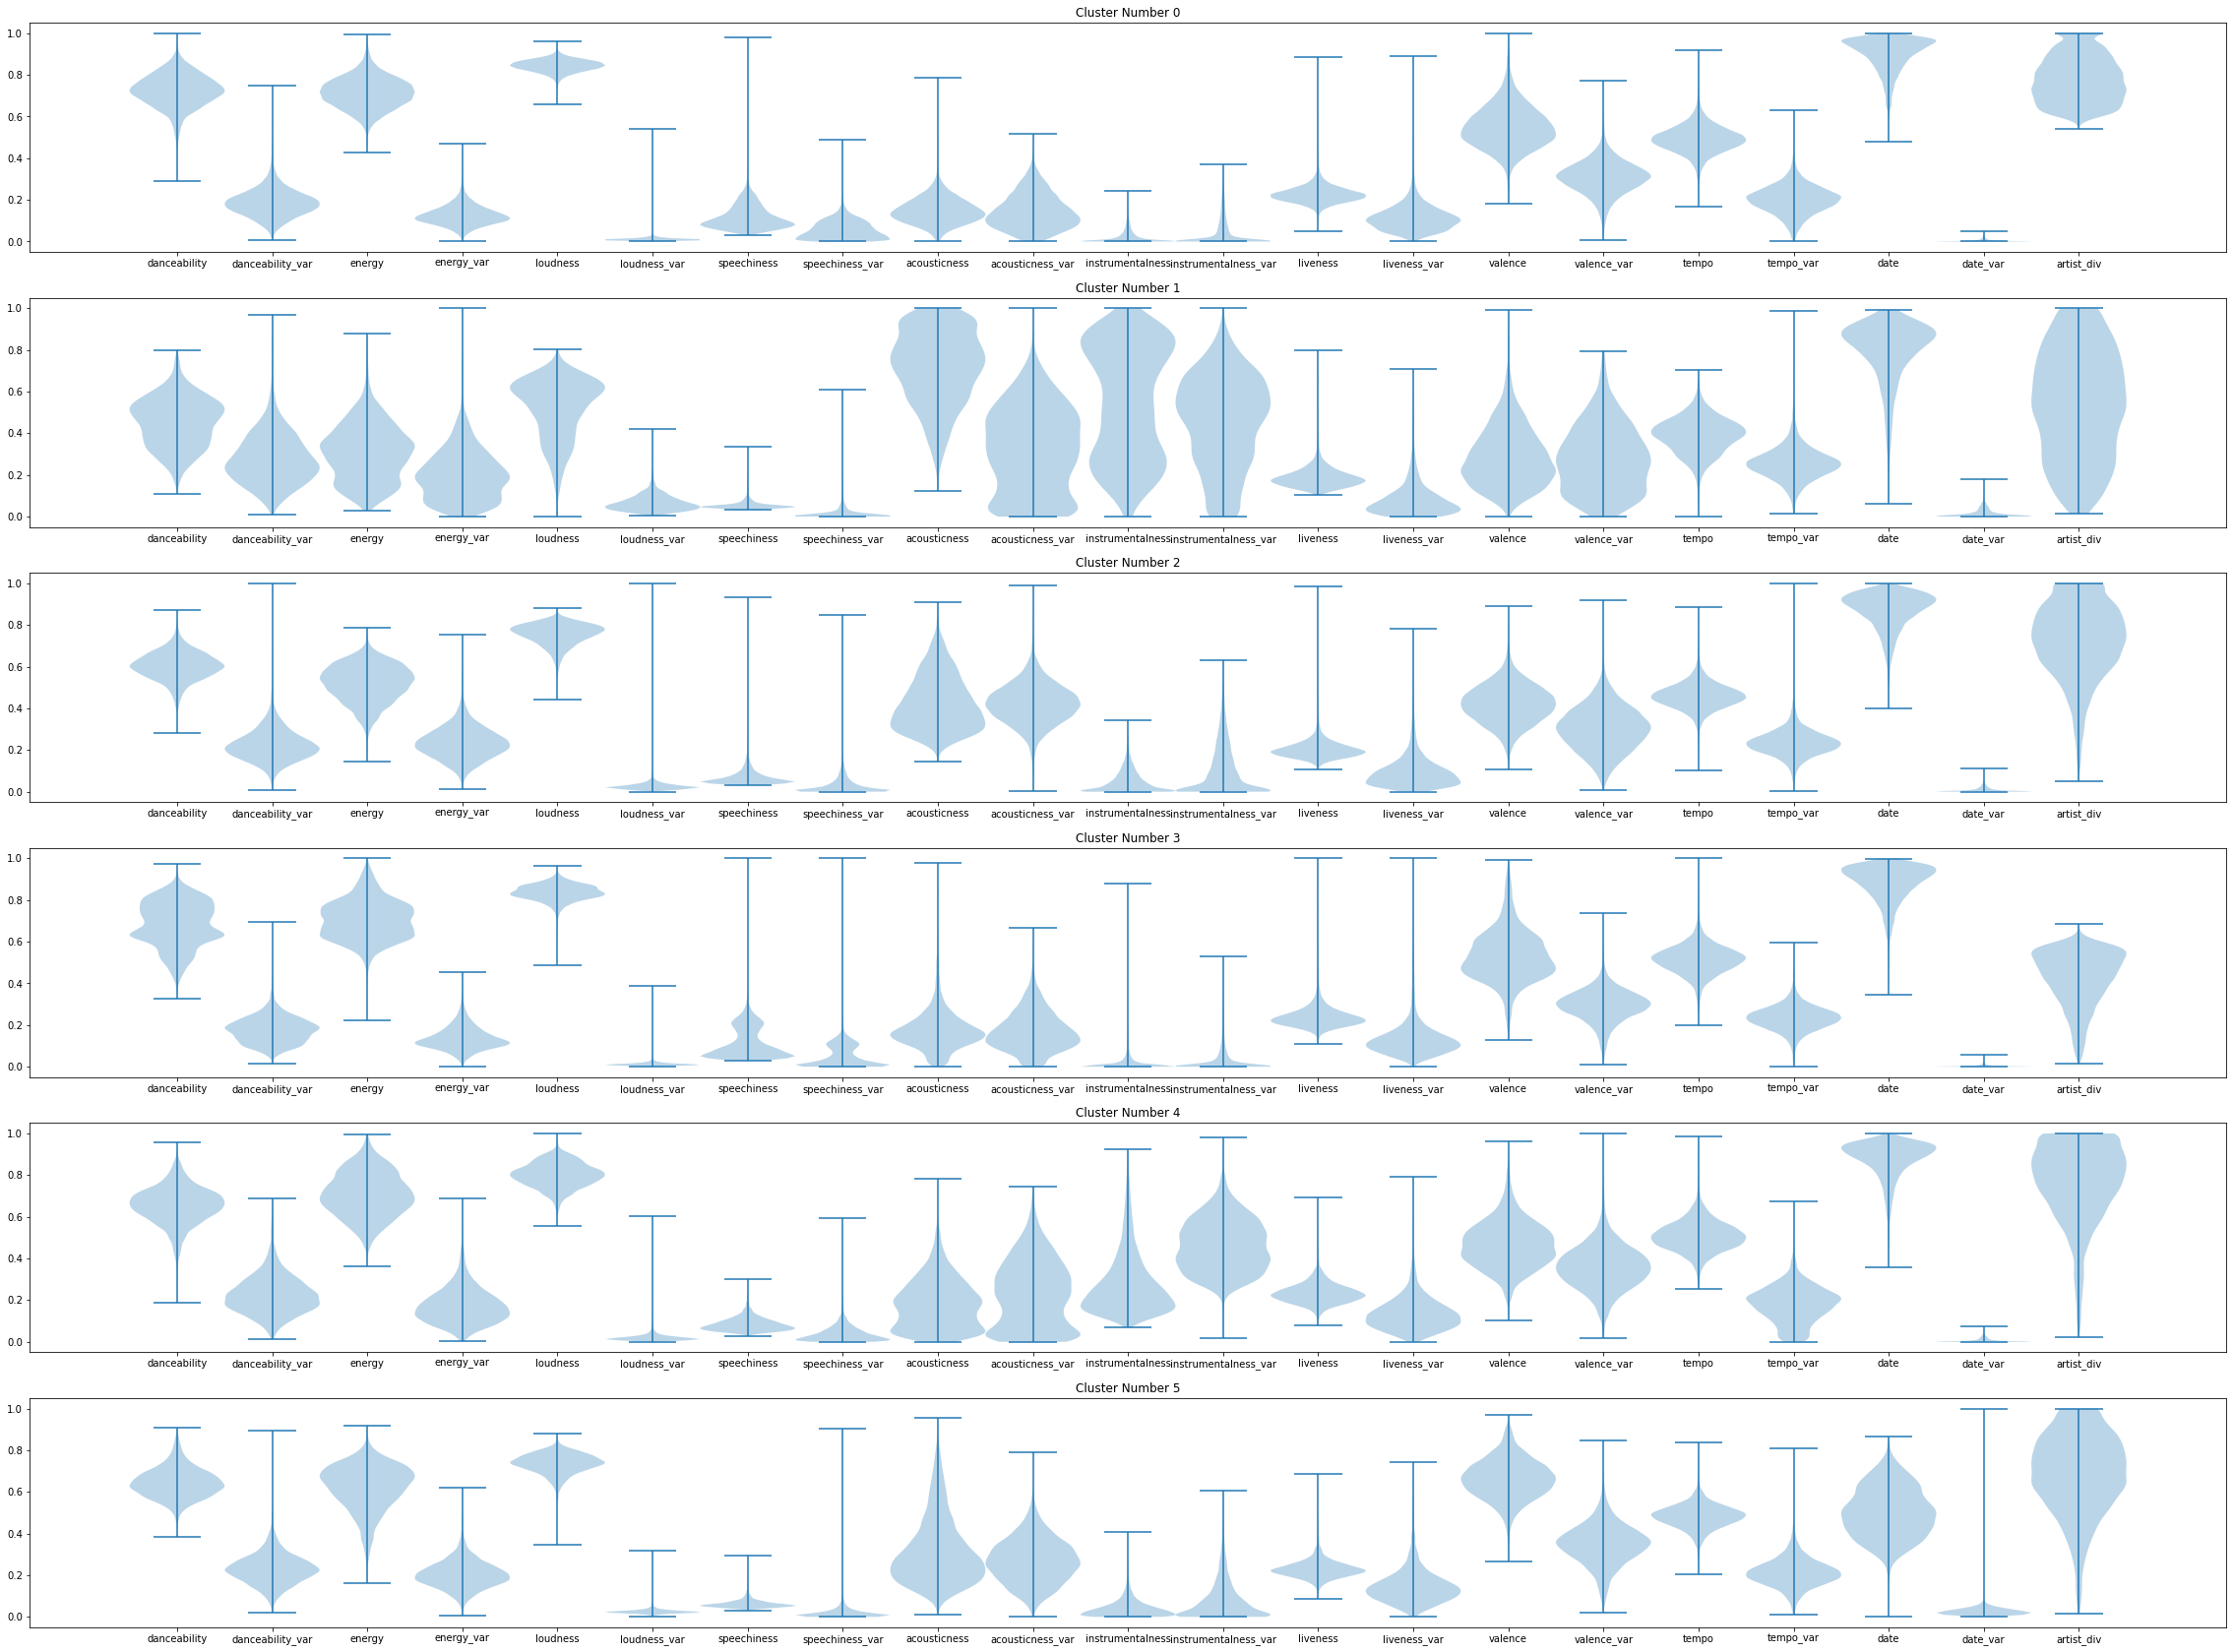

In [91]:
# violin plots
fig, axs = plt.subplots(NUM_CLUSTERS)
for i in range(NUM_CLUSTERS):
    axs[i].violinplot(data_by_labels[i], widths=1)
    axs[i].title.set_text('Cluster Number ' + str(i))
    plt.sca(axs[i])
    plt.xticks(range(1, 22), data_by_labels[i].columns.values.tolist())
fig.set_figheight(30)
fig.set_figwidth(40)

In [78]:
# drop_labels = np.array(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'date', 'artist_div'])
# # print(drop_labels)
# for label in drop_labels:
#     drop_labels = np.append(drop_labels, label + '_var')

# print(drop_labels)

all_drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/127570212.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  danceability_data = data_by_labels[3*i+j].drop(drop_labels, 1)


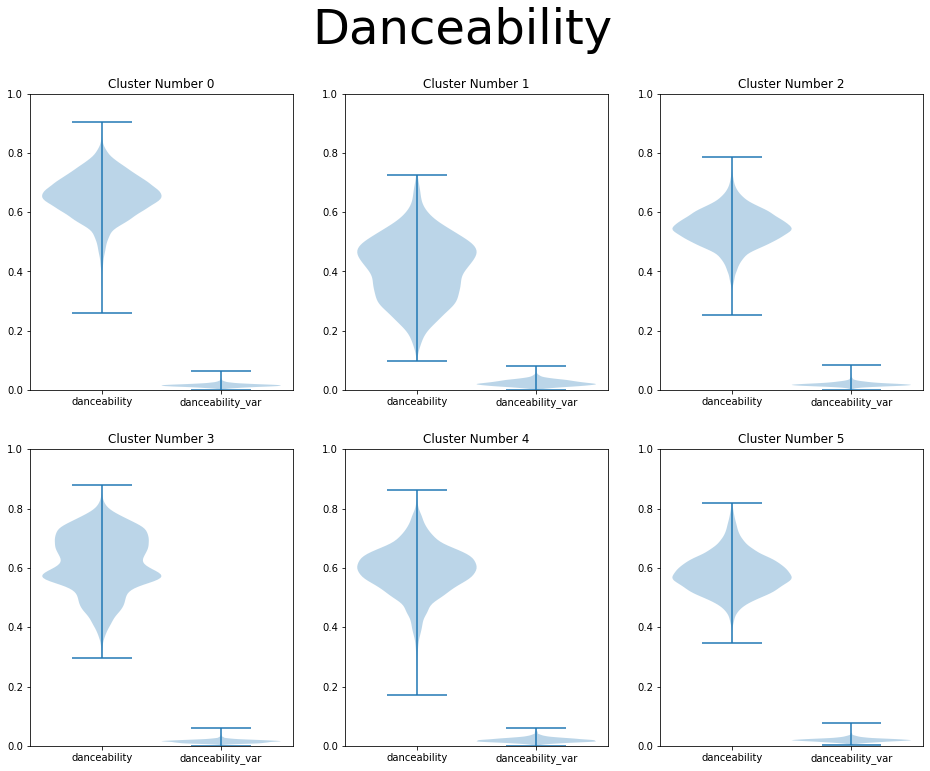

In [119]:
drop_labels = [
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Danceability", size=48)
for i in range(2):
    for j in range(3):
        danceability_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(danceability_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), danceability_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1853948590.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  energy_data = data_by_labels[3*i+j].drop(drop_labels, 1)


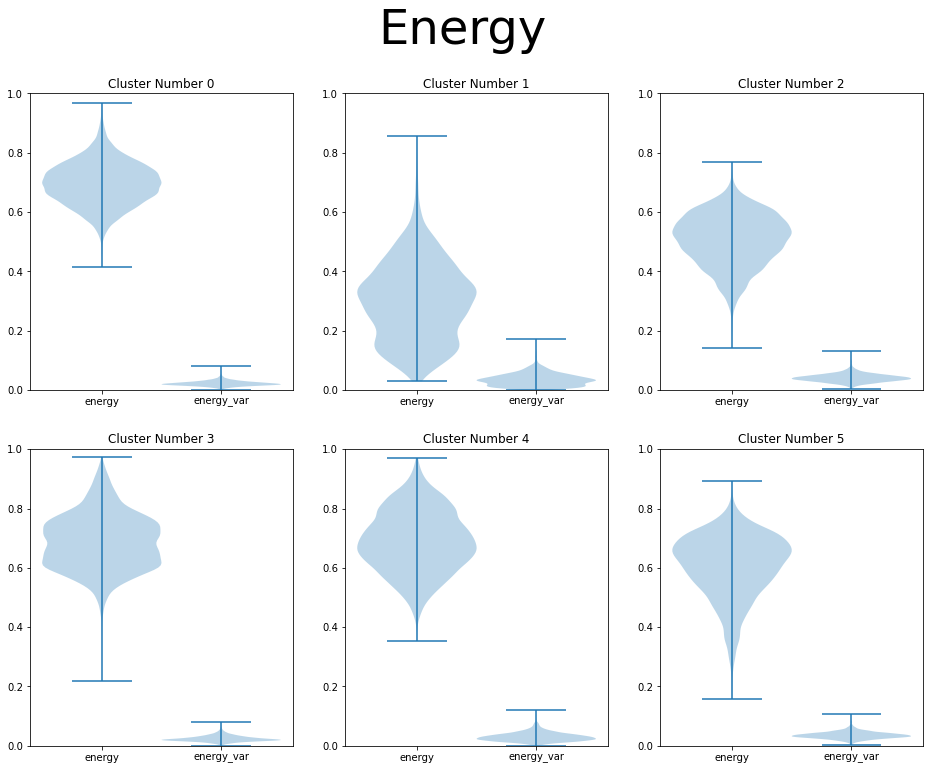

In [120]:
drop_labels = [
 'danceability', 'danceability_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Energy", size=48)
for i in range(2):
    for j in range(3):
        energy_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(energy_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), energy_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/3505177334.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loudness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


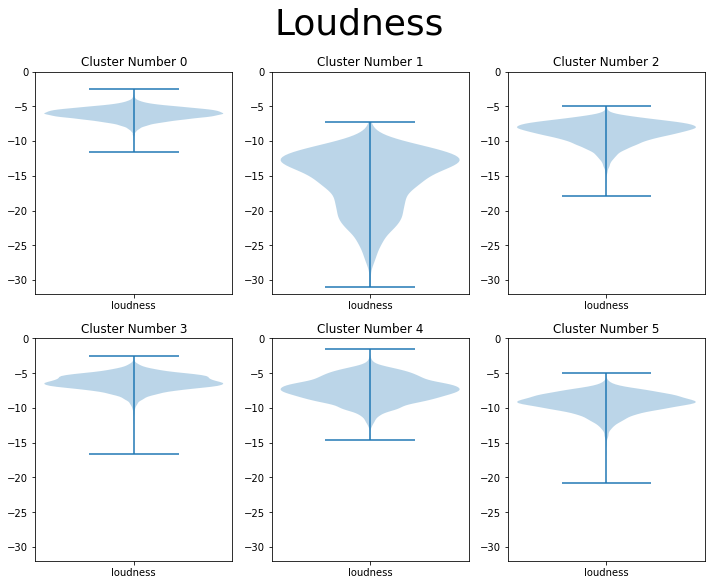

In [131]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness_var', 
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Loudness", size=36)
for i in range(2):
    for j in range(3):
        loudness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(loudness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(-32, 0)
        plt.xticks(range(1, 2), loudness_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/150626387.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loudness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


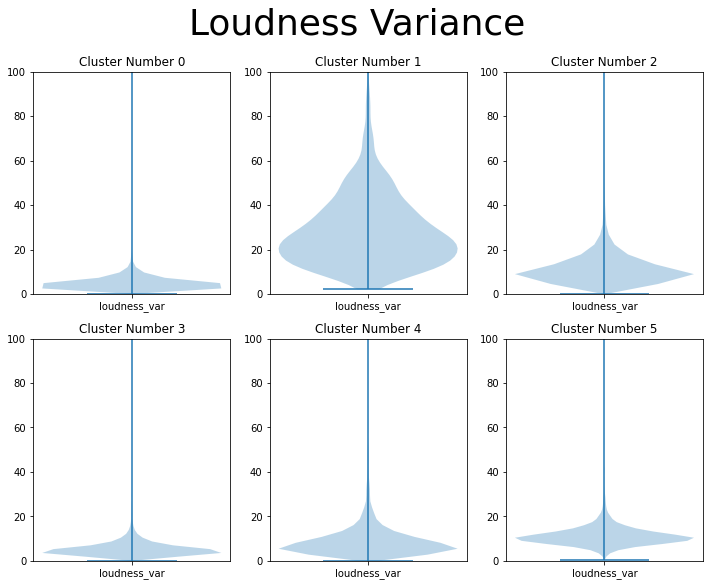

In [135]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Loudness Variance", size=36)
for i in range(2):
    for j in range(3):
        loudness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(loudness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0, 100)
        plt.xticks(range(1, 2), loudness_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/2376946841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  speechiness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


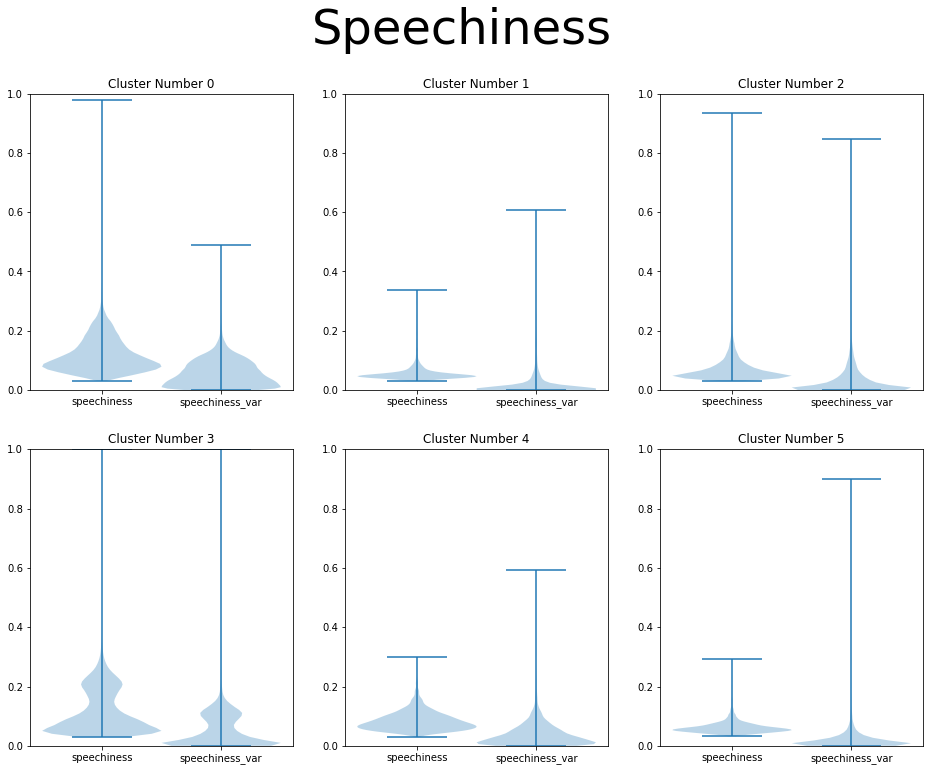

In [98]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Speechiness", size=48)
for i in range(2):
    for j in range(3):
        speechiness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(speechiness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), speechiness_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/2119472374.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  acousticness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


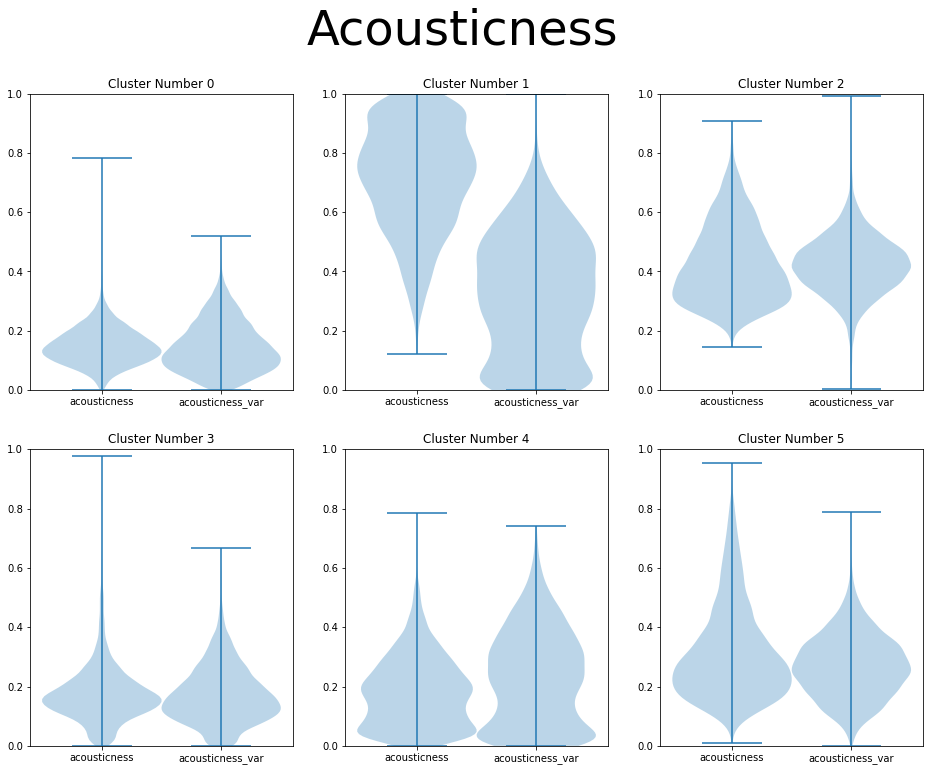

In [99]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Acousticness", size=48)
for i in range(2):
    for j in range(3):
        acousticness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(acousticness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), acousticness_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1244977462.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  instrumentalness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


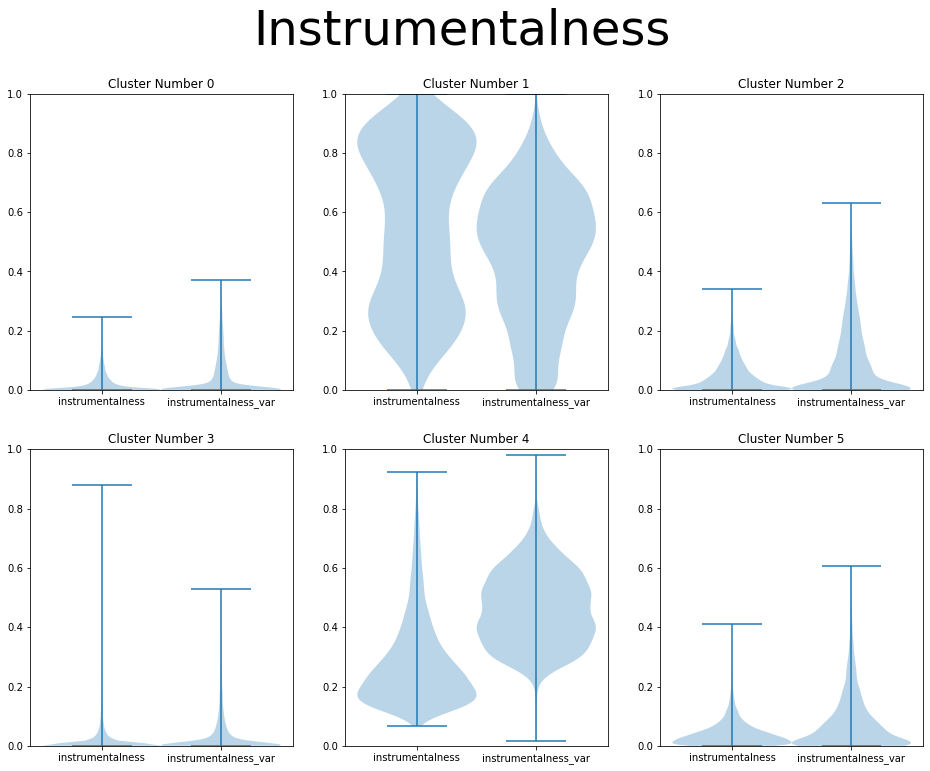

In [100]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Instrumentalness", size=48)
for i in range(2):
    for j in range(3):
        instrumentalness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(instrumentalness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), instrumentalness_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/2395552443.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  liveness_data = data_by_labels[3*i+j].drop(drop_labels, 1)


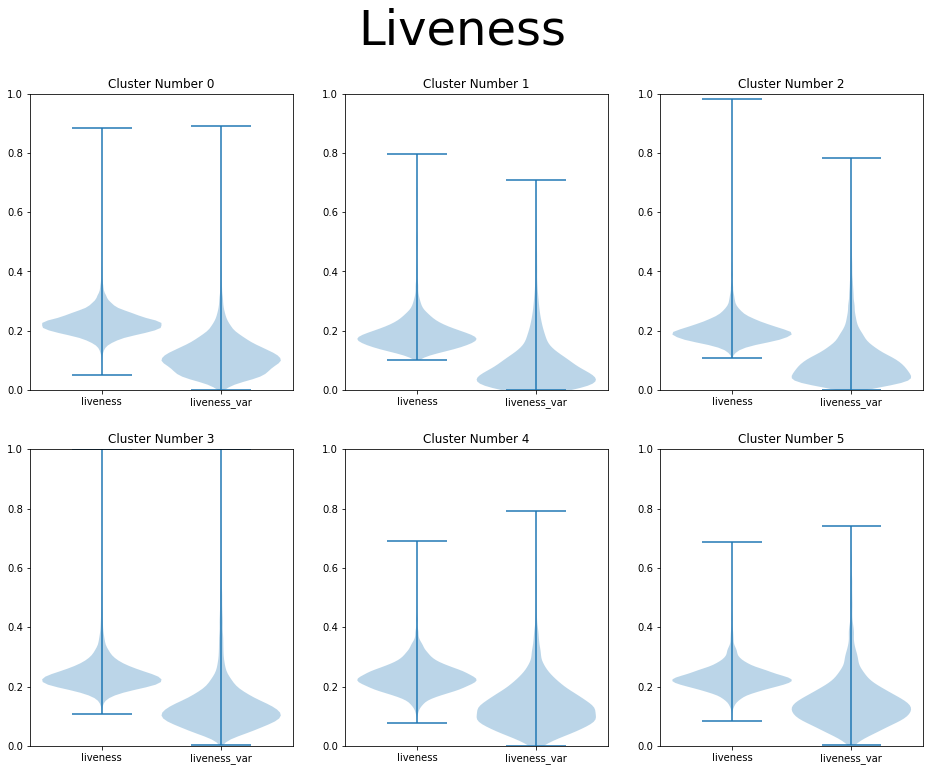

In [101]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Liveness", size=48)
for i in range(2):
    for j in range(3):
        liveness_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(liveness_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), liveness_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/785654996.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  valence_data = data_by_labels[3*i+j].drop(drop_labels, 1)


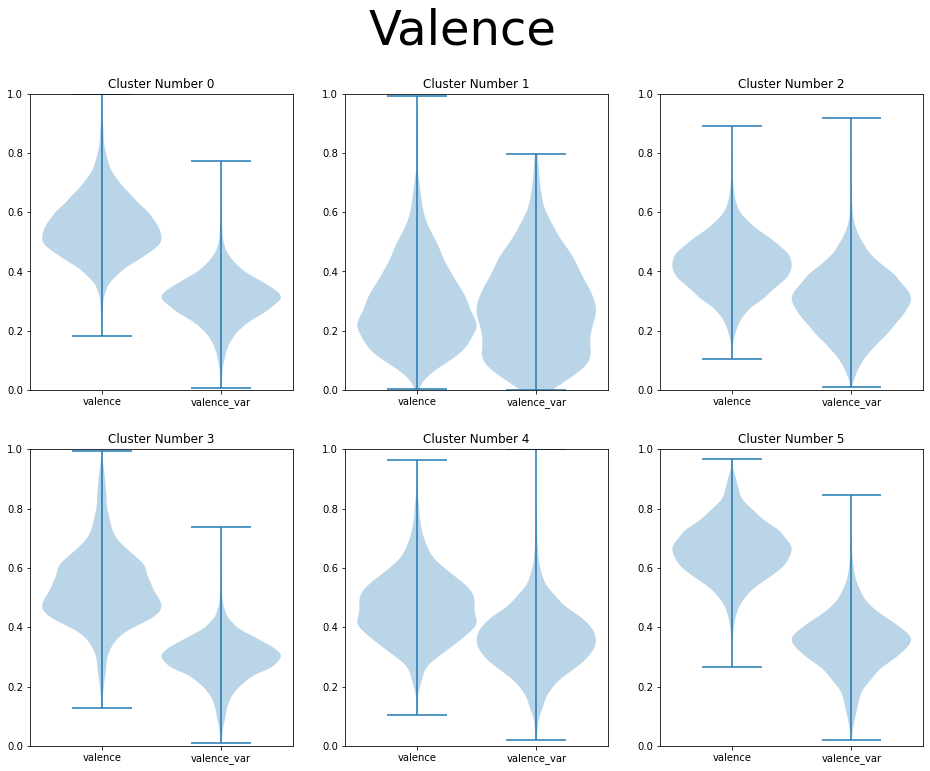

In [103]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'tempo', 'tempo_var',
 'date', 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Valence", size=48)
for i in range(2):
    for j in range(3):
        valence_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(valence_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 3), valence_data.columns.values.tolist())
fig.set_figheight(12)
fig.set_figwidth(16)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1692440516.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tempo_data = data_by_labels[3*i+j].drop(drop_labels, 1)


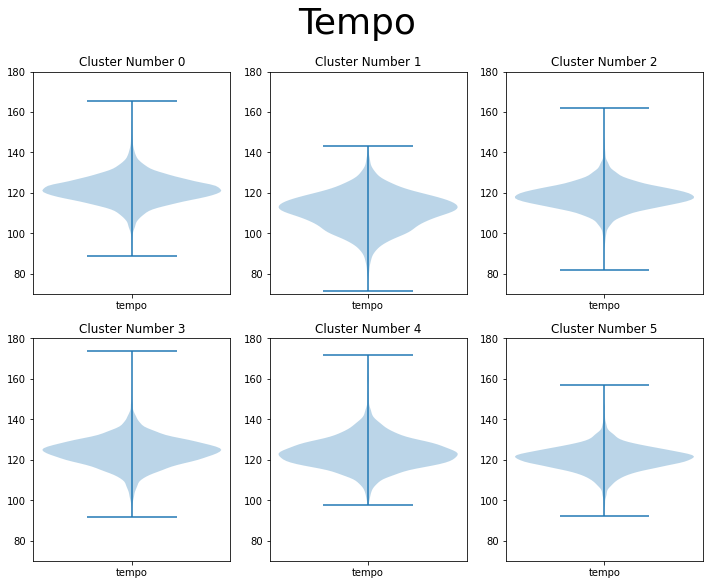

In [159]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'date', 'date_var',
 'tempo_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Tempo", size=36)
for i in range(2):
    for j in range(3):
        tempo_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(tempo_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(70,180)
        plt.xticks(range(1, 2), tempo_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/3780041327.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tempo_data = data_by_labels[3*i+j].drop(drop_labels, 1)


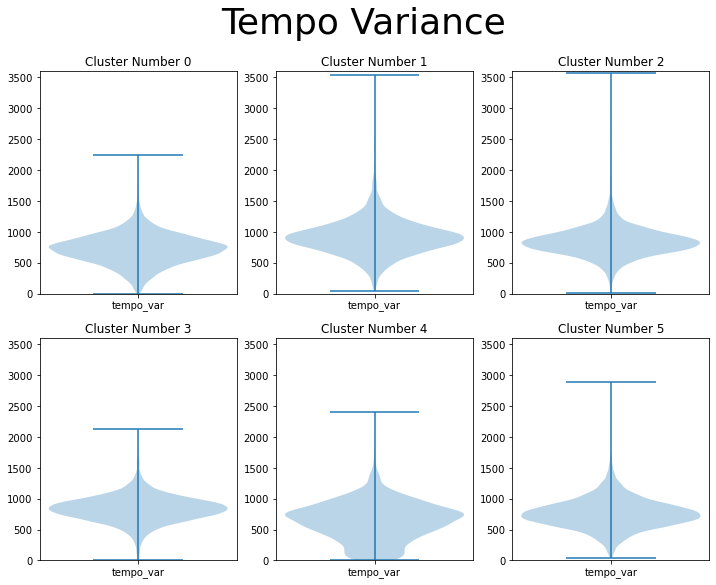

In [155]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'date', 'date_var',
 'tempo',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Tempo Variance", size=36)
for i in range(2):
    for j in range(3):
        tempo_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(tempo_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0, 3600)
        plt.xticks(range(1, 2), tempo_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/2522467845.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  date_data = data_by_labels[3*i+j].drop(drop_labels, 1)


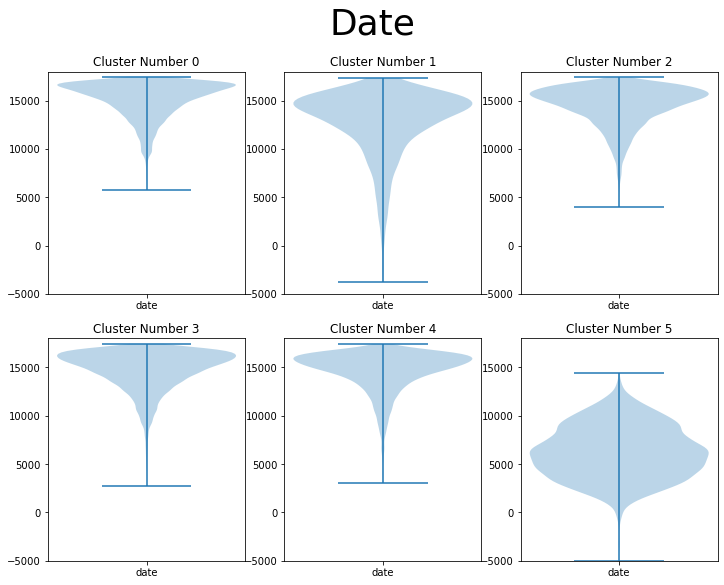

In [146]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date_var',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Date", size=36)
for i in range(2):
    for j in range(3):
        date_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(date_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(-5000,18000)
        plt.xticks(range(1, 2), date_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/1955370324.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  date_data = data_by_labels[3*i+j].drop(drop_labels, 1)


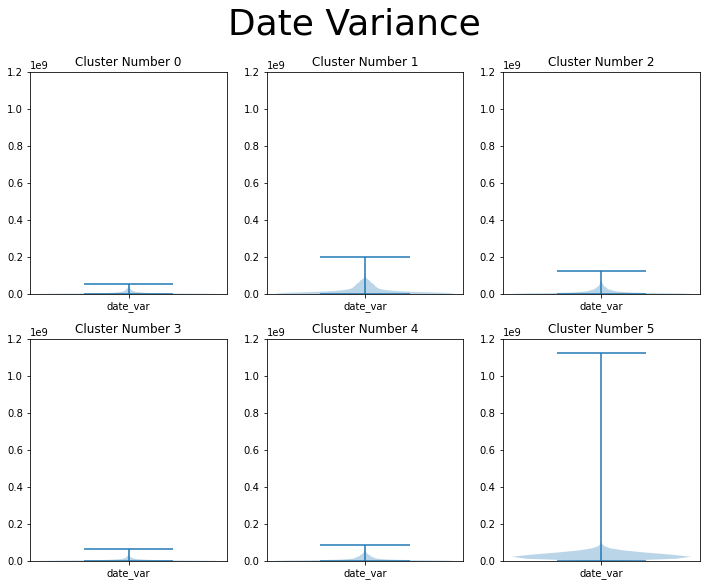

In [154]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date',
 'artist_div'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Date Variance", size=36)
for i in range(2):
    for j in range(3):
        date_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(date_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0, 1.2e9)
        plt.xticks(range(1, 2), date_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

/var/folders/f1/06_sb4pj60b3_t6f1ptwvv840000gn/T/ipykernel_11172/3282565384.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  artist_div_data = data_by_labels[3*i+j].drop(drop_labels, 1)


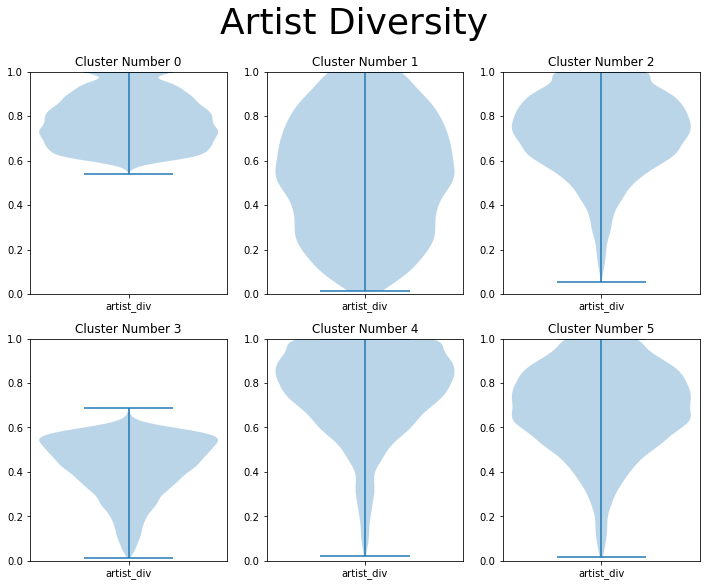

In [162]:
drop_labels = ['danceability', 'danceability_var',
 'energy', 'energy_var',
 'loudness', 'loudness_var',
 'speechiness', 'speechiness_var',
 'acousticness', 'acousticness_var',
 'instrumentalness', 'instrumentalness_var',
 'liveness', 'liveness_var',
 'valence', 'valence_var',
 'tempo', 'tempo_var',
 'date', 'date_var'
]

fig, axs = plt.subplots(2,3)
fig.suptitle("Artist Diversity", size=36)
for i in range(2):
    for j in range(3):
        artist_div_data = data_by_labels[3*i+j].drop(drop_labels, 1)
        axs[i,j].violinplot(artist_div_data, widths=1)
        axs[i,j].title.set_text('Cluster Number ' + str(3*i+j))
        plt.sca(axs[i,j])
        plt.ylim(0,1)
        plt.xticks(range(1, 2), artist_div_data.columns.values.tolist())
fig.set_figheight(9)
fig.set_figwidth(12)

In [160]:
# cluster sizes
for i in range(NUM_CLUSTERS):
    print(data_by_labels[i].shape[0])

20508
2041
10461
14047
4490
5453


In [163]:
import sklearn.metrics as metrics

In [169]:
print(metrics.silhouette_score(data, kmeans.labels_))
print(metrics.calinski_harabasz_score(data, kmeans.labels_))
print(metrics.davies_bouldin_score(data, kmeans.labels_))

0.36348579415499693
19138.06191326886
1.1876902573117405


([<matplotlib.axis.XTick at 0x7f8fb51a6f70>,
 [Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

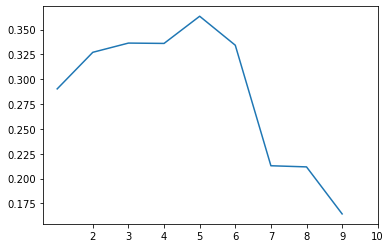

In [168]:
sil = []
for i in range(2,11):
    kmeans_for_sil = skc.KMeans(n_clusters=i).fit(data)
    sil_score = metrics.silhouette_score(data, kmeans_for_sil.labels_)
    sil.append(sil_score)

Text(0, 0.5, 'Score')

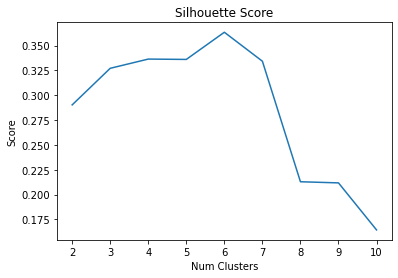

In [172]:
plt.plot(sil)
plt.xticks(range(0,9), range(2,11))
plt.title("Silhouette Score")
plt.xlabel("Num Clusters")
plt.ylabel("Score")

In [173]:
cal = []
for i in range(2,11):
    kmeans_for_cal = skc.KMeans(n_clusters=i).fit(data)
    cal_score = metrics.calinski_harabasz_score(data, kmeans_for_cal.labels_)
    cal.append(cal_score)

Text(0, 0.5, 'Score')

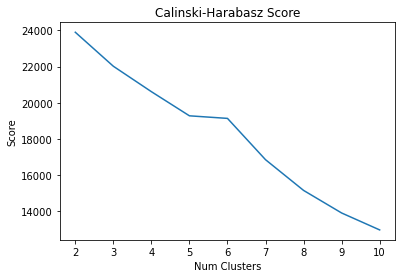

In [175]:
plt.plot(cal)
plt.xticks(range(0,9), range(2,11))
plt.title("Calinski-Harabasz Score")
plt.xlabel("Num Clusters")
plt.ylabel("Score")

In [176]:
dav = []
for i in range(2,11):
    kmeans_for_dav = skc.KMeans(n_clusters=i).fit(data)
    dav_score = metrics.davies_bouldin_score(data, kmeans_for_dav.labels_)
    dav.append(dav_score)

Text(0, 0.5, 'Score')

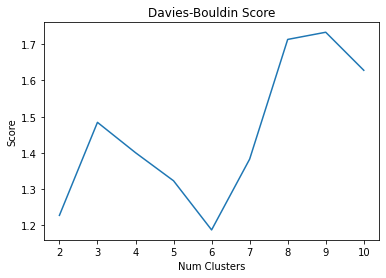

In [177]:
plt.plot(dav)
plt.xticks(range(0,9), range(2,11))
plt.title("Davies-Bouldin Score")
plt.xlabel("Num Clusters")
plt.ylabel("Score")